In [110]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import warnings
warnings.filterwarnings("ignore")

In [37]:

sys.path.append('.')
sys.path.append('..')
sys.path.append('../scripts')

from clean_dataframe import Clean_DataFrame
from visualize_dataframe import VisualizeDataframe
from utility import Utility

In [38]:
#read clean data
df = pd.read_csv('../data/week1_challenge_clean_data.csv')
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149993,1.311448e+19,2019-04-29 07:28:41,79.0,2019-04-30 18:22:23,512.0,125622.0,2.082014e+14,3.362611e+10,3.573531e+13,D73542B,...,18144703.0,8161828.0,20559422.0,20415237.0,569668054.0,1618788.0,168292600.0,11056036.0,43629118.0,623318363.0
149994,1.311448e+19,2019-04-29 07:28:41,83.0,2019-04-30 15:01:06,268.0,113545.0,2.082003e+14,3.364566e+10,3.515541e+13,T88383B,...,23043782.0,19176074.0,18762809.0,9591310.0,810666072.0,14858904.0,777865837.0,14693970.0,59377936.0,862796008.0
149995,1.304243e+19,2019-04-29 07:28:41,615.0,2019-04-30 00:01:49,407.0,59587.0,2.082014e+14,3.366865e+10,3.533251e+13,T85721A,...,6550499.0,18003146.0,22468983.0,7149728.0,784435351.0,12724751.0,321383162.0,14890486.0,53745392.0,819016468.0
149996,7.277826e+18,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,16191667.0,11763428.0,17883703.0,19678161.0,526609673.0,9197207.0,3264510.0,13487416.0,57628851.0,574175259.0


## User Overview Analysis
1. Identifying the top 10 handset used by the customers

In [39]:
top10handsets = df['Handset Type'].value_counts().nlargest(n=10)
top10handsets

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

Plot top 10 handset types

Text(0.5, 1.0, 'top 10 handset types')

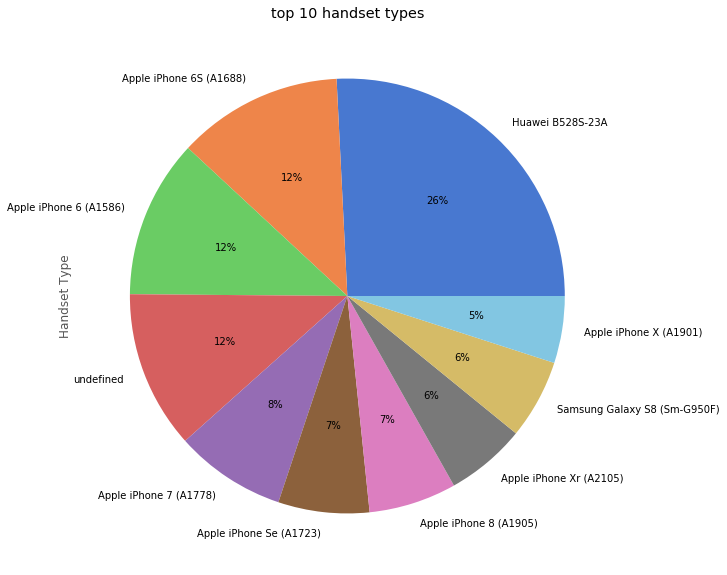

In [40]:
# Generate plot on top 10 handsets

fig = plt.figure(figsize=(10, 10))
last_num = len(top10handsets.values)
colors = sns.color_palette('muted')[0:last_num]
top10handsets.plot.pie(grid=True, colors=colors, autopct='%.000f%%')
plt.title('top 10 handset types')

2. Identify the top 3 handset manufacturers

In [41]:
# get the top 3 handset manufacturers
top3manufacturers = df['Handset Manufacturer'].value_counts().nlargest(n=3)
top3manufacturers

Apple      59564
Samsung    40839
Huawei     34422
Name: Handset Manufacturer, dtype: int64

plot top 3 manufacturers

Text(0.5, 1.0, 'top 3 handset manufacturers')

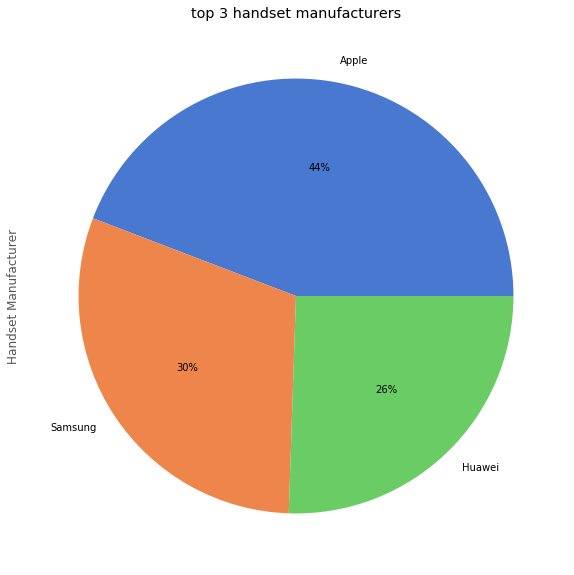

In [42]:
# Generate plot on top 3 handset manufacturers
fig = plt.figure(figsize = (10,10))
last_num = len(top3manufacturers.values)
colors = sns.color_palette('muted')[0:last_num]
top3manufacturers.plot.pie(grid=True, colors=colors, autopct='%.000f%%')
plt.title('top 3 handset manufacturers')

3. Identify the top 5 handset per top 3 handset manufacturer

In [43]:
apple_manufacturer = df.loc[df['Handset Manufacturer'] == 'Apple', ['Handset Type']].value_counts().nlargest(5)
samsung_manufacturer = df.loc[df['Handset Manufacturer'] == 'Samsung', ['Handset Type']].value_counts().nlargest(5)
huawei_manufacturer = df.loc[df['Handset Manufacturer'] == 'Huawei', ['Handset Type']].value_counts().nlargest(5)

print("Top 5 apple headset types\n", apple_manufacturer)
print("\nTop 5 samsung headset types\n", samsung_manufacturer)
print("\nTop 5 huawei headset types\n", huawei_manufacturer)

Top 5 apple headset types
 Handset Type           
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
dtype: int64

Top 5 samsung headset types
 Handset Type                
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
dtype: int64

Top 5 huawei headset types
 Handset Type                  
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
dtype: int64


4. Make a short interpretation and recommendation to marketing teams

**Interpretations**

- We can see that from the top 10 headsets used by the customers, Apple iPhone has wide number of users in general. Eventhough the heighest number of users seem to use Huawei B528S-23A, the over all Apple iPhone users surpass by 10,206 number of users.


**Recommendations**
- Therefore we need to market our telecom service to Samsung and Huawei users
- Optimize our service for Huawei B528S-23A, since it seem to be used by a large number of Huawei users


### Aggregate per user the following in the column

#### 1. Number of xDR sessions per user 
To find the number of xDR sessions per user we can use the MSISDN/Number to aggregate the data 

In [44]:
# 
df.groupby('MSISDN/Number')['Bearer Id'].sum()

MSISDN/Number
3.360100e+10    1.311448e+19
3.360100e+10    7.349883e+18
3.360100e+10    7.349883e+18
3.360101e+10    1.304243e+19
3.360101e+10    1.462771e+19
                    ...     
3.379000e+10    1.304243e+19
3.379000e+10    1.311448e+19
3.197021e+12    7.277826e+18
3.370000e+14    7.349883e+18
8.823971e+14    7.277826e+18
Name: Bearer Id, Length: 106854, dtype: float64

#### 2. Session duration

In [45]:
df.groupby('MSISDN/Number')['Dur. (ms)'].sum()

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106854, dtype: float64

#### 3. The total download (DL) and upload (UL) data

In [46]:
total_UL = df.groupby('MSISDN/Number')['Total UL (Bytes)'].sum()
total_DL = df.groupby('MSISDN/Number')['Total DL (Bytes)'].sum()
print(f'____Total download (DL)_______\n\n {total_DL}\n\n')
print(f'____Total upload (UL)_________\n\n {total_UL}')

____Total download (DL)_______

 MSISDN/Number
3.360100e+10    8.426375e+08
3.360100e+10    1.207552e+08
3.360100e+10    5.566597e+08
3.360101e+10    4.019932e+08
3.360101e+10    1.363130e+09
                    ...     
3.379000e+10    6.879252e+08
3.379000e+10    4.445751e+08
3.197021e+12    1.948281e+08
3.370000e+14    5.396350e+08
8.823971e+14    7.869760e+07
Name: Total DL (Bytes), Length: 106854, dtype: float64


____Total upload (UL)_________

 MSISDN/Number
3.360100e+10    36053108.0
3.360100e+10    36104459.0
3.360100e+10    39306820.0
3.360101e+10    20327526.0
3.360101e+10    94280527.0
                   ...    
3.379000e+10    26716429.0
3.379000e+10    35732243.0
3.197021e+12    37295915.0
3.370000e+14    56652839.0
8.823971e+14    60456049.0
Name: Total UL (Bytes), Length: 106854, dtype: float64


#### 4. The total data volume (in Bytes) during this session for each application

In [47]:
# total data volume for each application
total_google_DV = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
total_email_DV = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
total_youtube_DV = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
total_gaming_DV = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
total_netflix_DV = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
total_social_DV =df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
total_other_DV = df['Other DL (Bytes)'] + df['Other UL (Bytes)']

# add the total data volumes on the main dataset
df['total_google_DV'] = total_google_DV
df['total_youtube_DV'] = total_youtube_DV
df['total_email_DV'] = total_email_DV
df['total_gaming_DV'] = total_gaming_DV
df['total_netflix_DV'] = total_netflix_DV
df['total_social_DV'] = total_social_DV
df['total_other_DV'] = total_other_DV

# df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149998 entries, 0 to 149997
Data columns (total 62 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149998 non-null  float64
 1   Start                                     149998 non-null  object 
 2   Start ms                                  149998 non-null  float64
 3   End                                       149998 non-null  object 
 4   End ms                                    149998 non-null  float64
 5   Dur. (ms)                                 149998 non-null  float64
 6   IMSI                                      149998 non-null  float64
 7   MSISDN/Number                             149998 non-null  float64
 8   IMEI                                      149998 non-null  float64
 9   Last Location Name                        148846 non-null  object 
 10  Avg RTT DL (ms)     

Aggregate total DV for google

In [48]:
df.groupby('MSISDN/Number')['total_google_DV'].sum()

MSISDN/Number
3.360100e+10     4389005.0
3.360100e+10     5334863.0
3.360100e+10     3443126.0
3.360101e+10     9678493.0
3.360101e+10    18499616.0
                   ...    
3.379000e+10     7531269.0
3.379000e+10     5429705.0
3.197021e+12    10438660.0
3.370000e+14     9830617.0
8.823971e+14     9218647.0
Name: total_google_DV, Length: 106854, dtype: float64

Aggregate total DV of email

In [49]:
df.groupby('MSISDN/Number')['total_email_DV'].sum()

MSISDN/Number
3.360100e+10    1331362.0
3.360100e+10    3307781.0
3.360100e+10    3205380.0
3.360101e+10    2284670.0
3.360101e+10    3305469.0
                  ...    
3.379000e+10    1006915.0
3.379000e+10    2514097.0
3.197021e+12    1520771.0
3.370000e+14    3318582.0
8.823971e+14    3330974.0
Name: total_email_DV, Length: 106854, dtype: float64

Aggregate total DV of YouTube

In [50]:
df.groupby('MSISDN/Number')['total_youtube_DV'].sum()

MSISDN/Number
3.360100e+10    21624548.0
3.360100e+10    12432223.0
3.360100e+10    21333570.0
3.360101e+10     6977321.0
3.360101e+10    41533002.0
                   ...    
3.379000e+10    26647843.0
3.379000e+10    19851572.0
3.197021e+12    11959905.0
3.370000e+14    36734940.0
8.823971e+14    40940710.0
Name: total_youtube_DV, Length: 106854, dtype: float64

Aggregate total DV of Netflix

In [51]:
df.groupby('MSISDN/Number')['total_netflix_DV'].sum()

MSISDN/Number
3.360100e+10    27180981.0
3.360100e+10    11221763.0
3.360100e+10    19353900.0
3.360101e+10     1942092.0
3.360101e+10    49201724.0
                   ...    
3.379000e+10    14902538.0
3.379000e+10     8531060.0
3.197021e+12    26592300.0
3.370000e+14    30905042.0
8.823971e+14    28846230.0
Name: total_netflix_DV, Length: 106854, dtype: float64

Aggregate total DV of gaming

In [52]:

df.groupby('MSISDN/Number')['total_gaming_DV'].sum()

MSISDN/Number
3.360100e+10    8.124587e+08
3.360100e+10    1.197501e+08
3.360100e+10    5.388277e+08
3.360101e+10    3.911261e+08
3.360101e+10    1.314798e+09
                    ...     
3.379000e+10    6.603614e+08
3.379000e+10    4.370033e+08
3.197021e+12    1.780487e+08
3.370000e+14    5.101427e+08
8.823971e+14    4.307026e+07
Name: total_gaming_DV, Length: 106854, dtype: float64

Aggregate total DV of Social

In [53]:
df.groupby('MSISDN/Number')['total_social_DV'].sum()

MSISDN/Number
3.360100e+10    2232135.0
3.360100e+10    2660565.0
3.360100e+10    3195623.0
3.360101e+10     280294.0
3.360101e+10    2912542.0
                  ...    
3.379000e+10     300183.0
3.379000e+10     498569.0
3.197021e+12     715224.0
3.370000e+14     521566.0
8.823971e+14    1546088.0
Name: total_social_DV, Length: 106854, dtype: float64

Aggregate total DV of Other Applications

In [54]:
df.groupby('MSISDN/Number')['total_other_DV'].sum()

MSISDN/Number
3.360100e+10    386570872.0
3.360100e+10    281710071.0
3.360100e+10    501693672.0
3.360101e+10     35279702.0
3.360101e+10    804804484.0
                   ...     
3.379000e+10    295282817.0
3.379000e+10    211115113.0
3.197021e+12    470526473.0
3.370000e+14    149188439.0
8.823971e+14    401360457.0
Name: total_other_DV, Length: 106854, dtype: float64

Finally save the new(added) data set 

In [55]:
#save to csv file
df.to_csv('../data/week1_challenge_aggregated_data.csv', index=False)

## EDA
conduct an EDA on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing by the mean of the corresponding column

1.1 Describe all relevant variables and associated data types

In [56]:
#relevant variables and associated data types
selected_features = ['Dur. (ms)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'total_google_DV', 'total_email_DV', 'total_gaming_DV', 'total_youtube_DV', 'total_netflix_DV', 'total_social_DV', 'total_other_DV']
df.info(selected_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149998 entries, 0 to 149997
Data columns (total 62 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149998 non-null  float64
 1   Start                                     149998 non-null  object 
 2   Start ms                                  149998 non-null  float64
 3   End                                       149998 non-null  object 
 4   End ms                                    149998 non-null  float64
 5   Dur. (ms)                                 149998 non-null  float64
 6   IMSI                                      149998 non-null  float64
 7   MSISDN/Number                             149998 non-null  float64
 8   IMEI                                      149998 non-null  float64
 9   Last Location Name                        148846 non-null  object 
 10  Avg RTT DL (ms)     

1.2 Analyze the basic metrics

Find the basic mertircs (mean, median, etc.) of the selected/relevant features in the Dataset

In [57]:
df[selected_features].describe()
# print('_______---------___________Mode:_________---------------__\n' ,df[selected_features].mode())

,Dur. (ms),Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),total_google_DV,total_email_DV,total_gaming_DV,total_youtube_DV,total_netflix_DV,total_social_DV,total_other_DV
count,1.499980e+05,1.499980e+05,1.499980e+05,1.499980e+05,149998.000000,1.499980e+05,1.499980e+05,1.499980e+05,149998.000000,1.499980e+05,...,1.499980e+05,1.499980e+05,1.499980e+05,1.499980e+05,1.499980e+05,1.499980e+05,1.499980e+05,1.499980e+05,1.499980e+05,1.499980e+05
mean,1.046086e+05,1.829201e+06,1.408898e+06,1.795332e+06,32928.633722,5.750776e+06,2.056527e+06,1.791728e+06,467371.972320,1.163402e+07,...,8.264825e+06,4.112132e+07,4.546431e+08,7.807303e+06,2.259100e+06,4.303327e+08,2.264351e+07,2.262870e+07,1.828261e+06,4.293647e+08
std,8.103816e+04,5.696430e+06,4.643259e+06,1.035488e+06,19006.285412,3.309124e+06,1.189921e+06,1.035849e+06,269971.656643,6.710572e+06,...,4.769012e+06,1.127641e+07,2.441441e+08,3.516454e+06,1.071119e+06,2.440220e+08,9.246881e+06,9.260878e+06,1.035652e+06,2.432672e+08
min,7.142000e+03,0.000000e+00,0.000000e+00,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,...,1.480000e+02,2.866892e+06,7.114041e+06,4.033000e+04,8.359000e+03,3.063580e+05,7.890300e+04,9.843200e+04,1.563000e+03,1.490450e+05
25%,5.743750e+04,1.487800e+04,2.153925e+04,8.991550e+05,16448.250000,2.882354e+06,1.024266e+06,8.927562e+05,233373.250000,5.833442e+06,...,4.145949e+06,3.322204e+07,2.431061e+08,4.943578e+06,1.359341e+06,2.187262e+08,1.599846e+07,1.597949e+07,9.322232e+05,2.185539e+08
50%,8.639900e+04,3.930600e+04,4.679500e+04,1.794372e+06,32920.000000,5.765904e+06,2.054550e+06,1.793534e+06,466225.500000,1.161601e+07,...,8.267086e+06,4.114346e+07,4.558411e+08,7.812876e+06,2.263574e+06,4.316152e+08,2.266181e+07,2.263581e+07,1.826486e+06,4.299923e+08
75%,1.324308e+05,6.796105e+05,5.991078e+05,2.694940e+06,49334.000000,8.623632e+06,3.088453e+06,2.689332e+06,700444.500000,1.744848e+07,...,1.238430e+07,4.903424e+07,6.657064e+08,1.068296e+07,3.159838e+06,6.414166e+08,2.929277e+07,2.929092e+07,2.727493e+06,6.399274e+08
max,1.859336e+06,1.365365e+08,1.449113e+08,3.586064e+06,65870.000000,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,2.325910e+07,...,1.655882e+07,7.833131e+07,9.029696e+08,1.552878e+07,4.518036e+06,8.592028e+08,4.519008e+07,4.519815e+07,3.650861e+06,8.595209e+08


### 1.3 Conduct a Non-Graphical Univariate Analysis

computing dispersion parameters for each quantitative variable and provide useful interpretation.

In [58]:

df[selected_features].describe()

,Dur. (ms),Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),total_google_DV,total_email_DV,total_gaming_DV,total_youtube_DV,total_netflix_DV,total_social_DV,total_other_DV
count,1.499980e+05,1.499980e+05,1.499980e+05,1.499980e+05,149998.000000,1.499980e+05,1.499980e+05,1.499980e+05,149998.000000,1.499980e+05,...,1.499980e+05,1.499980e+05,1.499980e+05,1.499980e+05,1.499980e+05,1.499980e+05,1.499980e+05,1.499980e+05,1.499980e+05,1.499980e+05
mean,1.046086e+05,1.829201e+06,1.408898e+06,1.795332e+06,32928.633722,5.750776e+06,2.056527e+06,1.791728e+06,467371.972320,1.163402e+07,...,8.264825e+06,4.112132e+07,4.546431e+08,7.807303e+06,2.259100e+06,4.303327e+08,2.264351e+07,2.262870e+07,1.828261e+06,4.293647e+08
std,8.103816e+04,5.696430e+06,4.643259e+06,1.035488e+06,19006.285412,3.309124e+06,1.189921e+06,1.035849e+06,269971.656643,6.710572e+06,...,4.769012e+06,1.127641e+07,2.441441e+08,3.516454e+06,1.071119e+06,2.440220e+08,9.246881e+06,9.260878e+06,1.035652e+06,2.432672e+08
min,7.142000e+03,0.000000e+00,0.000000e+00,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,...,1.480000e+02,2.866892e+06,7.114041e+06,4.033000e+04,8.359000e+03,3.063580e+05,7.890300e+04,9.843200e+04,1.563000e+03,1.490450e+05
25%,5.743750e+04,1.487800e+04,2.153925e+04,8.991550e+05,16448.250000,2.882354e+06,1.024266e+06,8.927562e+05,233373.250000,5.833442e+06,...,4.145949e+06,3.322204e+07,2.431061e+08,4.943578e+06,1.359341e+06,2.187262e+08,1.599846e+07,1.597949e+07,9.322232e+05,2.185539e+08
50%,8.639900e+04,3.930600e+04,4.679500e+04,1.794372e+06,32920.000000,5.765904e+06,2.054550e+06,1.793534e+06,466225.500000,1.161601e+07,...,8.267086e+06,4.114346e+07,4.558411e+08,7.812876e+06,2.263574e+06,4.316152e+08,2.266181e+07,2.263581e+07,1.826486e+06,4.299923e+08
75%,1.324308e+05,6.796105e+05,5.991078e+05,2.694940e+06,49334.000000,8.623632e+06,3.088453e+06,2.689332e+06,700444.500000,1.744848e+07,...,1.238430e+07,4.903424e+07,6.657064e+08,1.068296e+07,3.159838e+06,6.414166e+08,2.929277e+07,2.929092e+07,2.727493e+06,6.399274e+08
max,1.859336e+06,1.365365e+08,1.449113e+08,3.586064e+06,65870.000000,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,2.325910e+07,...,1.655882e+07,7.833131e+07,9.029696e+08,1.552878e+07,4.518036e+06,8.592028e+08,4.519008e+07,4.519815e+07,3.650861e+06,8.595209e+08


In [59]:
#TODO: provide useful interpretation about the data
df[selected_features].skew()

Dur. (ms)                    3.952580
Activity Duration DL (ms)    5.872216
Activity Duration UL (ms)    7.382509
Social Media DL (Bytes)     -0.002159
Social Media UL (Bytes)     -0.000383
Google DL (Bytes)           -0.008111
Google UL (Bytes)            0.002238
Email DL (Bytes)            -0.002460
Email UL (Bytes)             0.007373
Youtube DL (Bytes)           0.000227
Youtube UL (Bytes)          -0.001159
Netflix DL (Bytes)          -0.002459
Netflix UL (Bytes)          -0.000120
Gaming DL (Bytes)           -0.003455
Gaming UL (Bytes)           -0.001840
Other DL (Bytes)             0.001392
Other UL (Bytes)             0.001394
Total UL (Bytes)            -0.002479
Total DL (Bytes)            -0.003150
total_google_DV             -0.010609
total_email_DV              -0.006027
total_gaming_DV             -0.003221
total_youtube_DV            -0.005471
total_netflix_DV            -0.000434
total_social_DV             -0.002144
total_other_DV               0.001249
dtype: float

As we can see from computed dispersion of quantitative variables,
>  if value < -1 => skewed to the left
if value > 1 => skewed to the right
if -1 > value < 1 => is symmetric

based on that we can interprate the dispersion as:
- The user spends more time on downloading than uploading
- The user consumes/transact slightly more data on gaming

### 1.4 Conduct a Graphical Univariate Analysis 
Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpret your findings.

**Quantitative Univariate analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC90088508>,
      dtype=object)

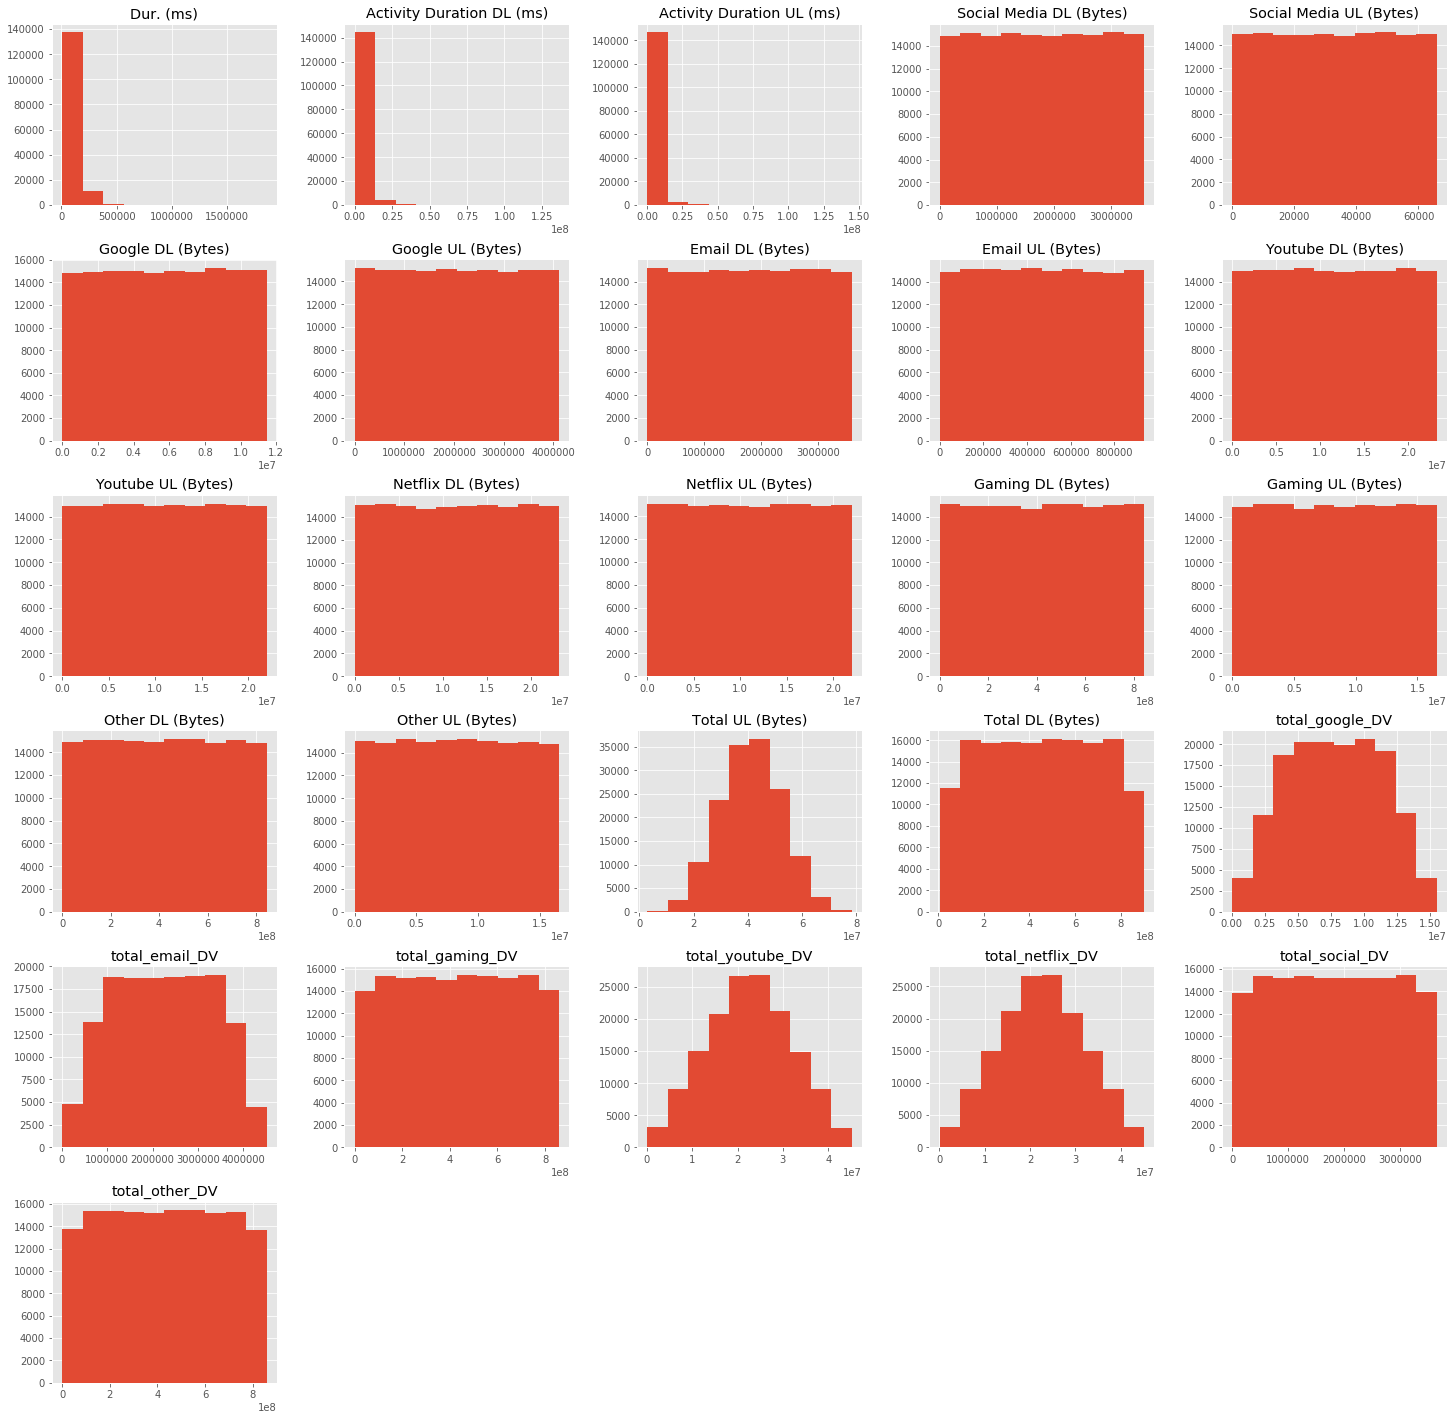

In [60]:
fig = plt.figure(figsize= (25, 25))
ax = fig.gca()
df[selected_features].hist(ax = ax)

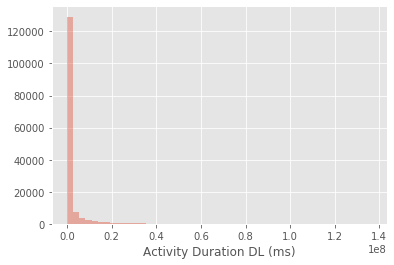

In [61]:
sns.distplot(df['Activity Duration DL (ms)'], kde=False)

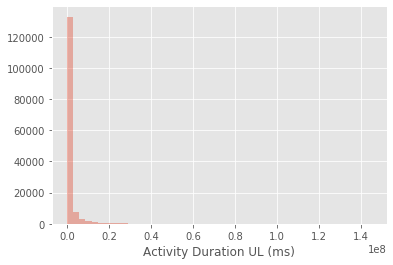

In [62]:

sns.distplot(df['Activity Duration UL (ms)'], kde=False)

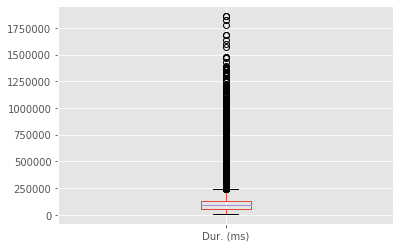

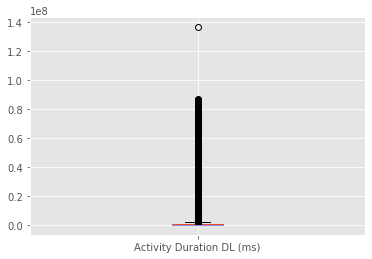

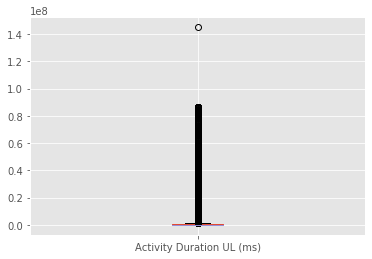

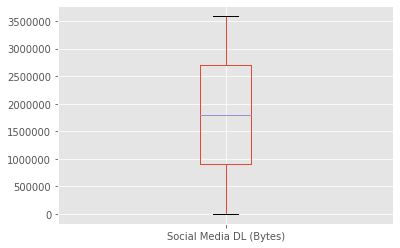

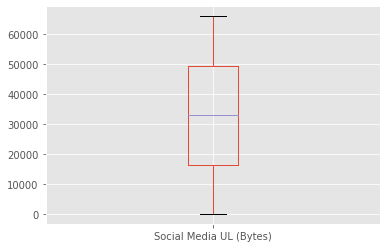

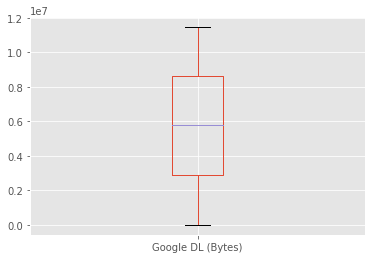

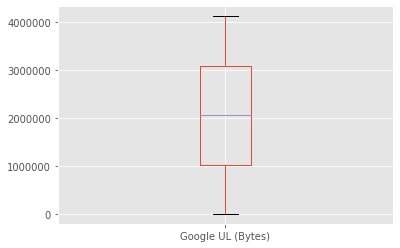

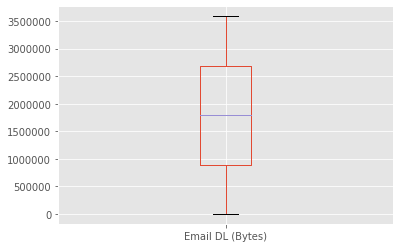

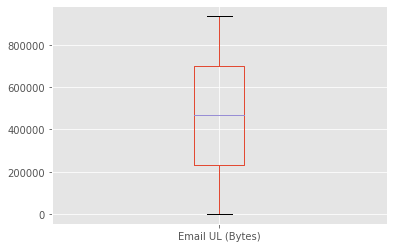

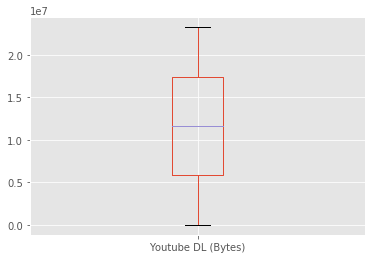

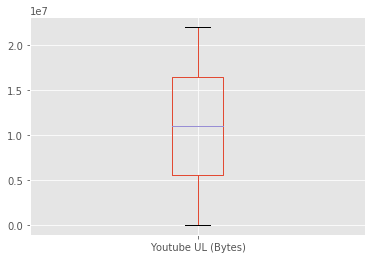

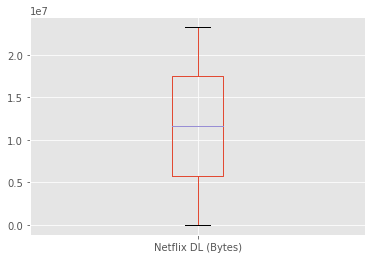

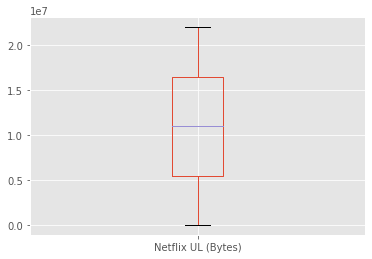

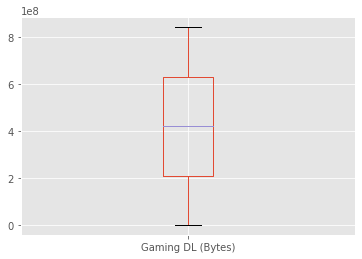

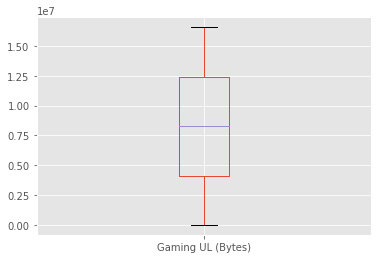

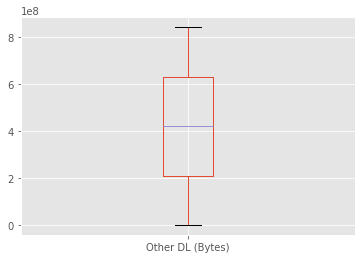

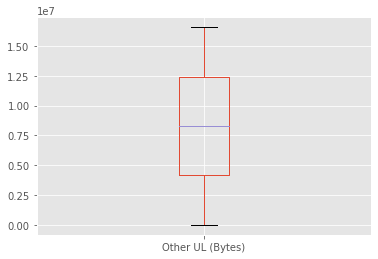

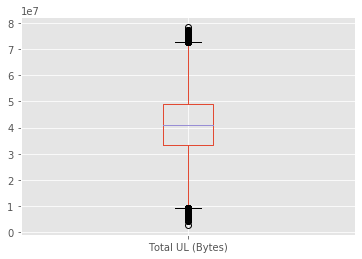

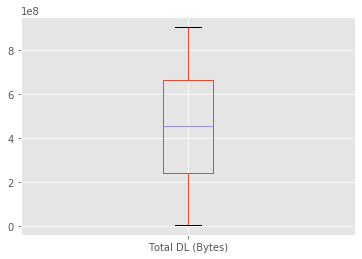

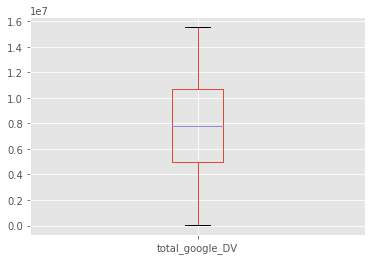

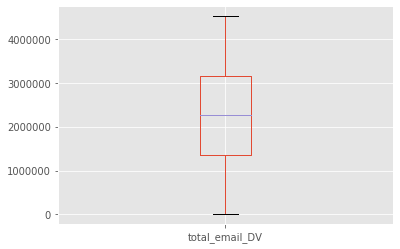

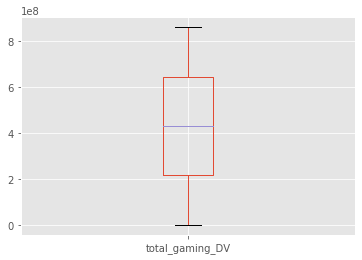

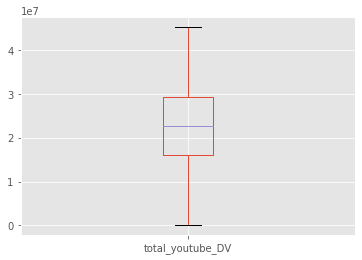

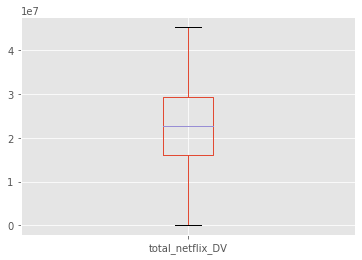

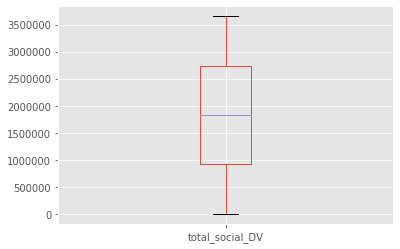

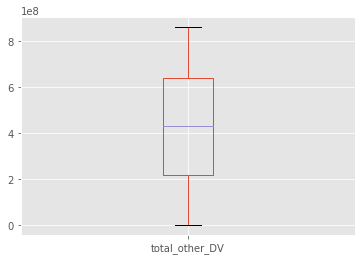

In [63]:
for features in selected_features:
    plt.figure()
    df.boxplot([features])

As we can see from the boxplots we have high degree of outliers in Duration in (ms), Activity Duration UL, Activity duration DL, and total UL data features

#### Fix outlier 

column to be filled with median values: Dur. (ms)
column to be filled with median values: Activity Duration DL (ms)
column to be filled with median values: Activity Duration UL (ms)
column to be filled with median values: Total UL (Bytes)


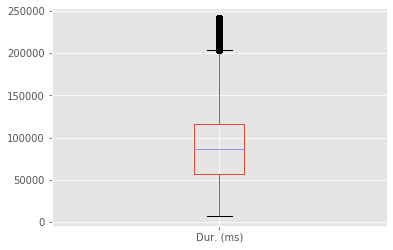

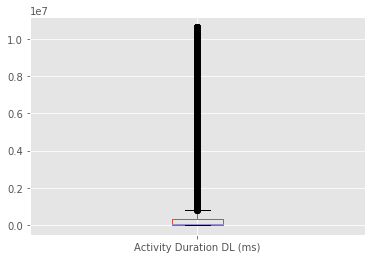

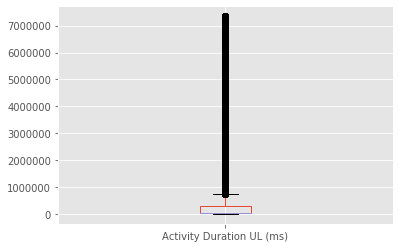

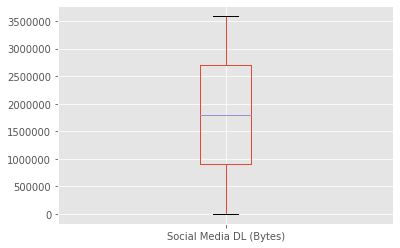

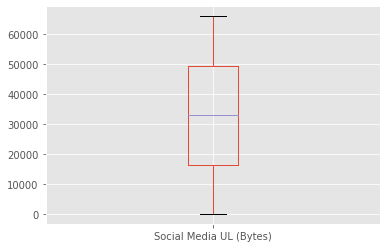

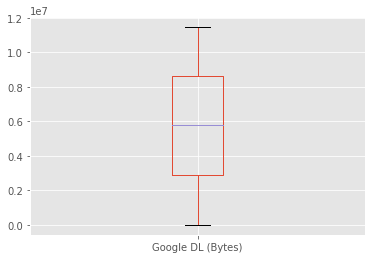

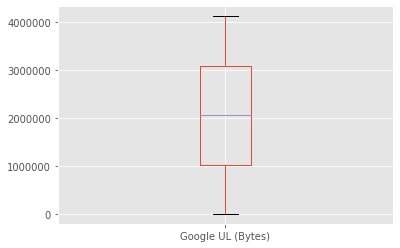

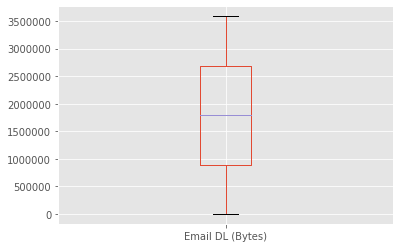

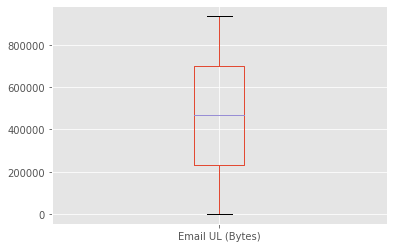

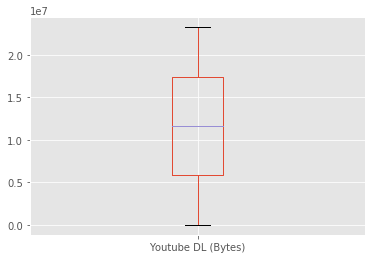

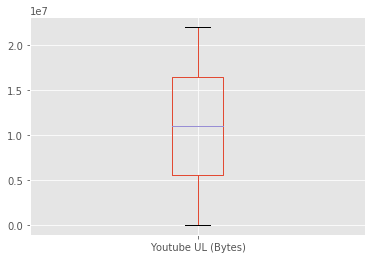

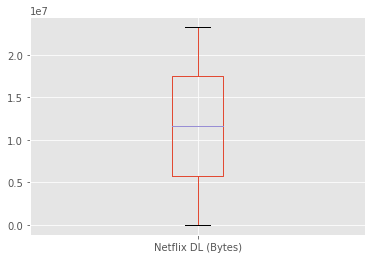

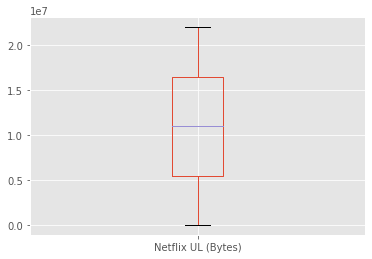

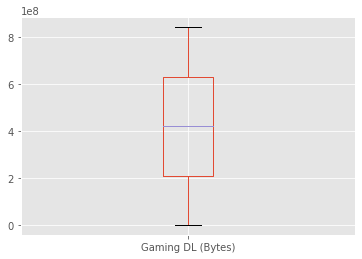

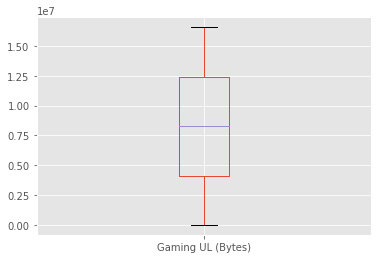

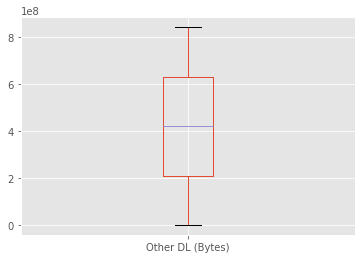

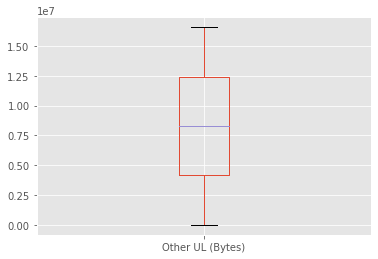

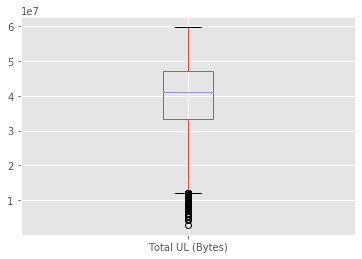

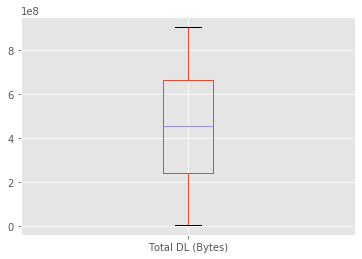

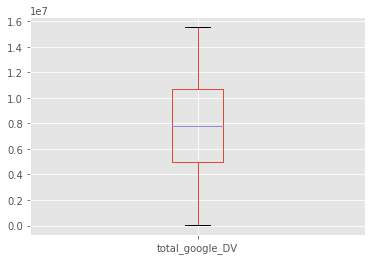

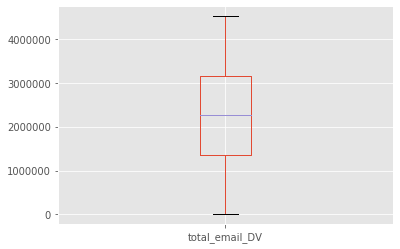

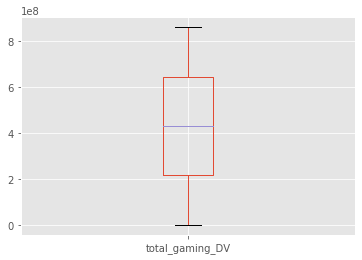

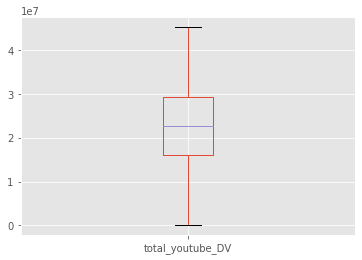

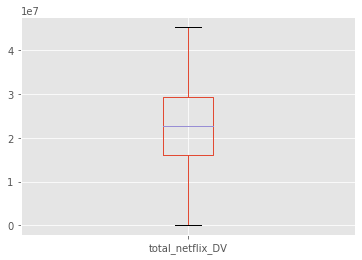

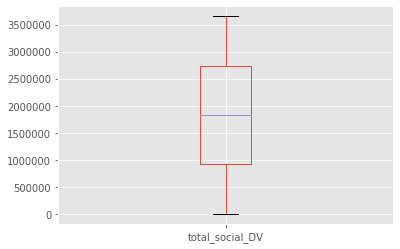

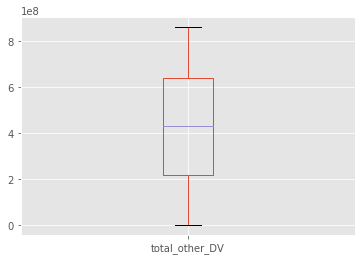

In [64]:
utility = Utility()

df['Dur. (ms)'] = utility.fix_outlier(df, 'Dur. (ms)')
df['Activity Duration DL (ms)'] = utility.fix_outlier(df, 'Activity Duration DL (ms)')
df['Activity Duration UL (ms)'] = utility.fix_outlier(df, 'Activity Duration UL (ms)')
df['Total UL (Bytes)'] = utility.fix_outlier(df, 'Total UL (Bytes)')

# Box plot of selected features after outlier fix
for features in selected_features:
    plt.figure()
    df.boxplot([features])

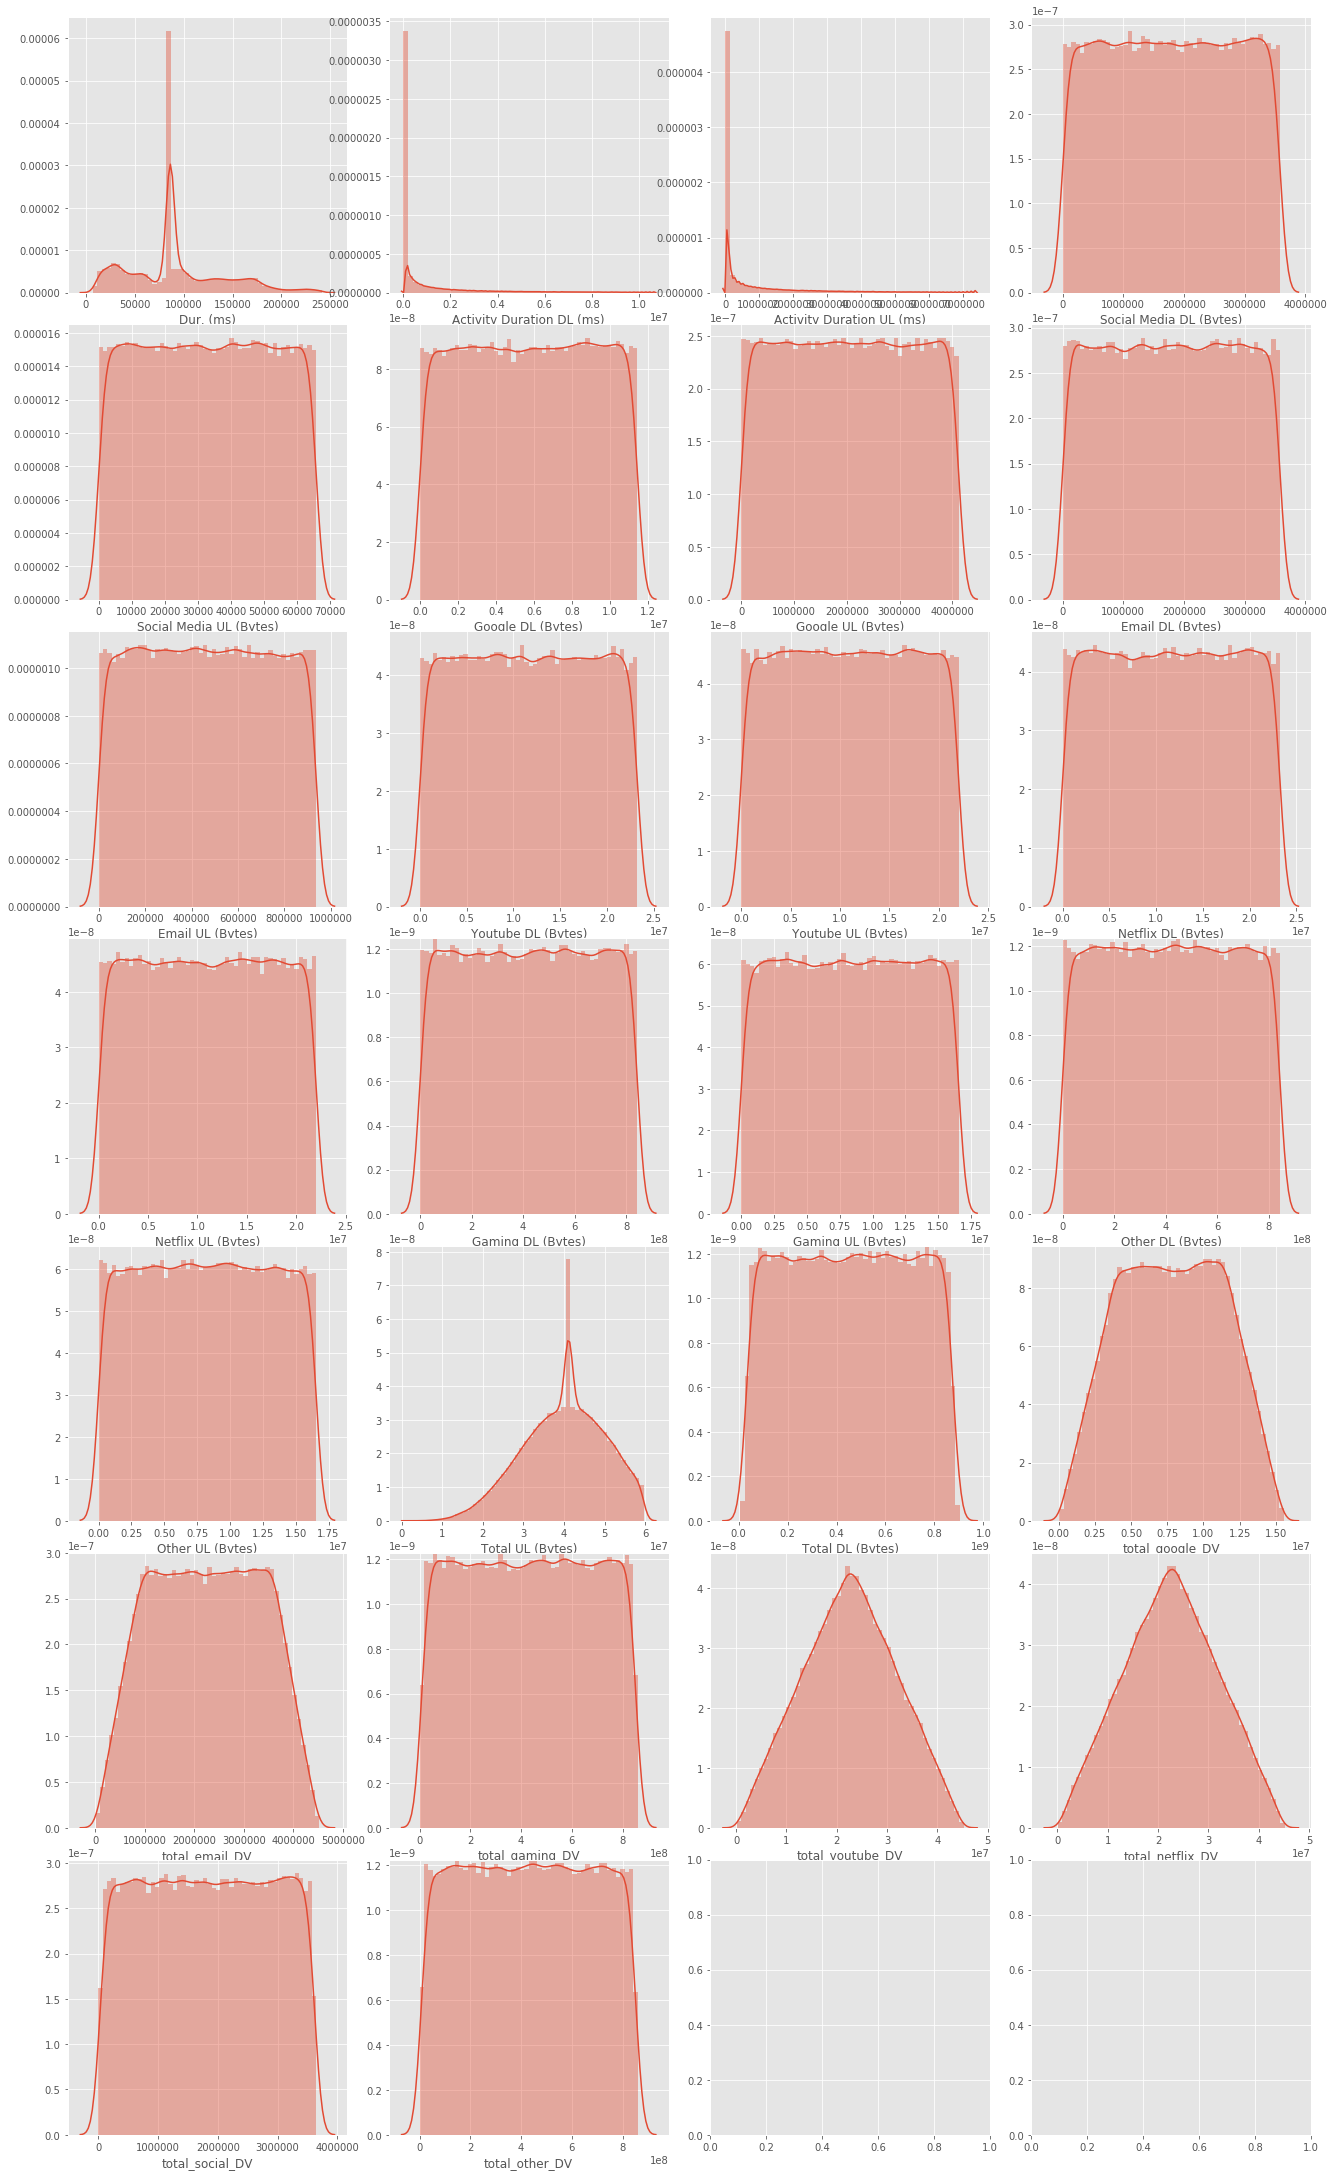

In [65]:
visiualize = VisualizeDataframe(df=df)
visiualize.plot_multiple_histograms(df, selected_features)

**Fix Outliers in the Activity Duration UL & DL (ms)**

In [66]:
top10handsets.index
# plot = sns.countplot(x = "Handset Type", data=top10handsets)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

Index(['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)',
       'undefined', 'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)',
       'Apple iPhone 8 (A1905)', 'Apple iPhone Xr (A2105)',
       'Samsung Galaxy S8 (Sm-G950F)', 'Apple iPhone X (A1901)'],
      dtype='object')

**Categorical univariant data analysis**

In [69]:
# extract categorical features 
categorical_features = ['Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [70]:
ser1 = df.sample(frac=0.3, random_state=777)[categorical_features[1]].value_counts().nlargest(10)
ser2 = df.sample(frac=0.3, random_state=777)[categorical_features[2]].value_counts().nlargest(10)

name1 = ser1.keys()
count1 = ser1.values
name2 = ser2.keys()
count2 = ser2.values


df1 = pd.DataFrame({'Handset Manufacturer': name1, 'count': count1})
df2 = pd.DataFrame({'Handset Type': name2, 'count': count2})
print(df1, '\n\n', df2)

                   Handset Manufacturer  count
0                                 Apple  17963
1                               Samsung  12107
2                                Huawei  10318
3                             undefined   2775
4         Sony Mobile Communications Ab    294
5                      Wiko Global Sasu    215
6          Xiaomi Communications Co Ltd    119
7  Oneplus Technology (Shenzhen) Co Ltd     97
8                               Asustek     88
9                                Lenovo     76 

                    Handset Type  count
0              Huawei B528S-23A   5938
1                     undefined   2775
2       Apple iPhone 6S (A1688)   2743
3        Apple iPhone 6 (A1586)   2692
4        Apple iPhone 7 (A1778)   1873
5       Apple iPhone Se (A1723)   1567
6        Apple iPhone 8 (A1905)   1550
7       Apple iPhone Xr (A2105)   1418
8  Samsung Galaxy S8 (Sm-G950F)   1357
9        Apple iPhone X (A1901)   1194


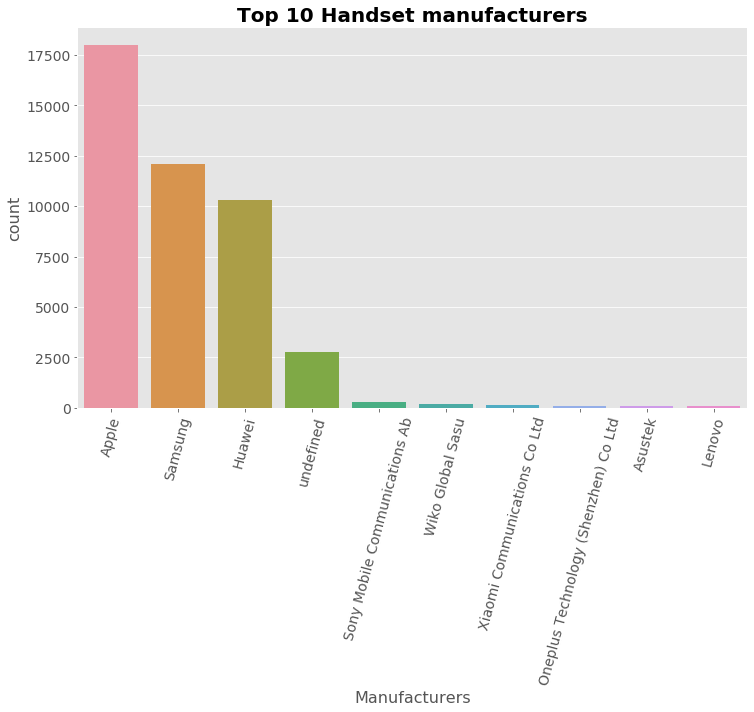

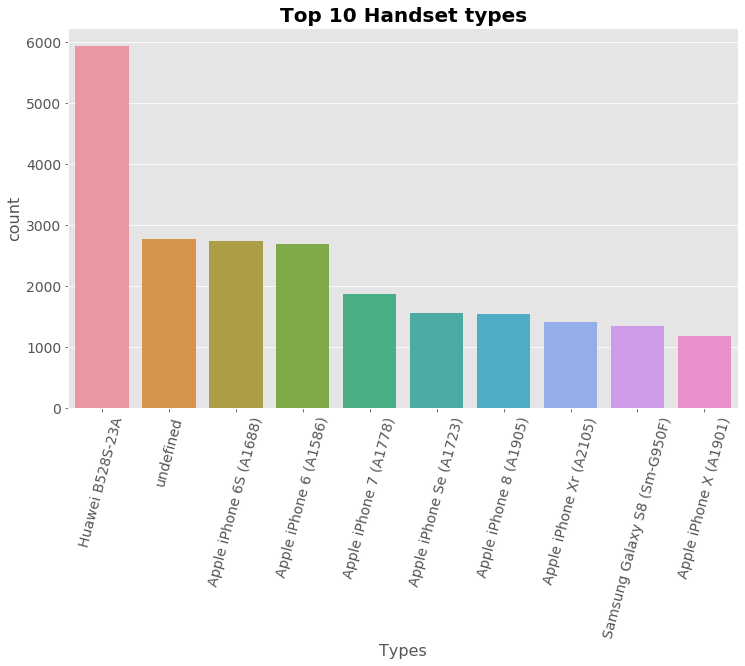

In [73]:
visiualize.plot_bar(df= df1, x_col='Handset Manufacturer', y_col='count', title = 'Top 10 Handset manufacturers', xlabel= 'Manufacturers', ylabel='count')
visiualize.plot_bar(df= df2, x_col='Handset Type', y_col='count', title = 'Top 10 Handset types', xlabel= 'Types', ylabel='count')

**Interpretation**
> From the chart we can infer that:
   > - Very few of the handset manufacturers dominate market share
   >- Very few of the handset types are used by the users

### 1.5 Bivariate Analysis
Bivariate Analysis - Explore the relationship between each application & total DL+UL data using appropriate methods and interpret your findings.

#### Total Social Media Data Volume VS Total Data Volume

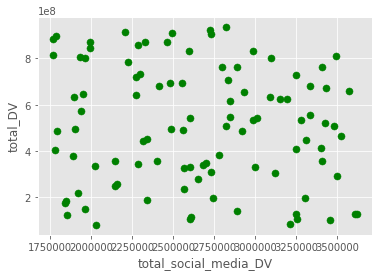

In [100]:
# take sample data
df['total_DV'] = df["Total DL (Bytes)"] + df["Total UL (Bytes)"]
df['total_social_media_DV'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']

df[df['total_social_media_DV'] > 1.729234e+06].sample(100).plot.scatter(x='total_social_media_DV', y='total_DV', c='green', s=50)


#### Total Email Data Volume VS Total Data Volume

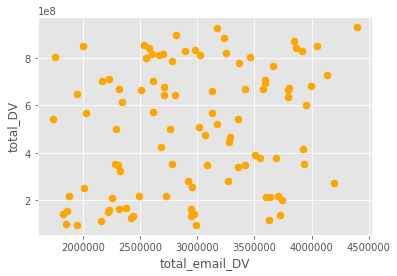

In [99]:

df[df['total_email_DV'] > 1.729234e+06].sample(100).plot.scatter(x='total_email_DV', y='total_DV', c='orange', s=50)


#### Total Google Data Volume VS Total Data Volume

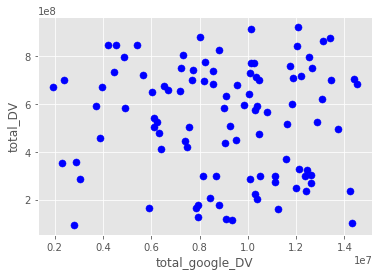

In [101]:

df[df['total_google_DV'] > 1.729234e+06].sample(100).plot.scatter(x='total_google_DV', y='total_DV', c='blue', s=50)

#### Total YouTube Data Volume VS Total Data Volume

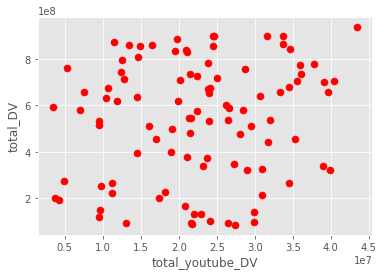

In [102]:
df[df['total_youtube_DV'] > 1.729234e+06].sample(100).plot.scatter(x='total_youtube_DV', y='total_DV', c='red', s=50)

#### Total Netflix Data Volume VS Total Data Volume

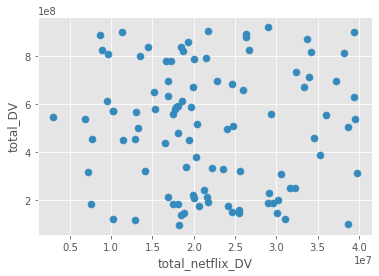

In [98]:
df[df['total_netflix_DV'] > 1.729234e+06].sample(100).plot.scatter(x='total_netflix_DV', y='total_DV', s=50)

#### Total Other Data Volume VS Total Data Volume

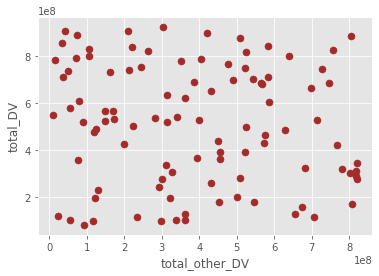

In [107]:
df[df['total_other_DV'] > 1.729234e+06].sample(100).plot.scatter(x='total_other_DV', y='total_DV', c='brown', s=50)

1.7 Correlation Analysis 

Download Corelation

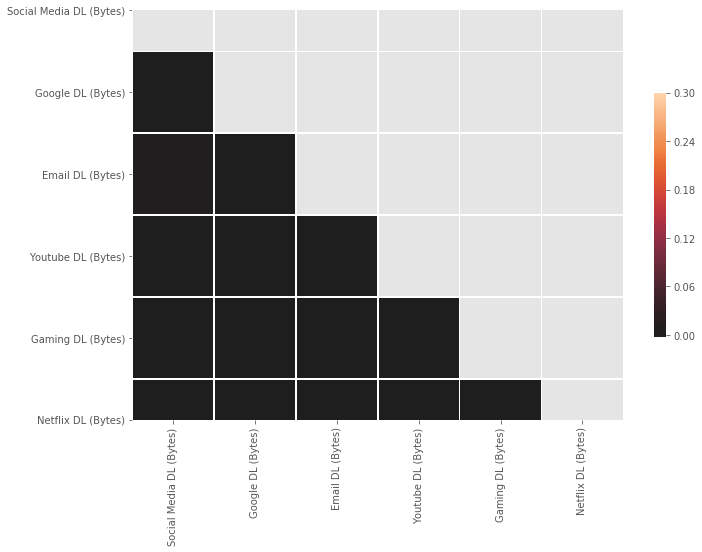

In [111]:
dlCorelation =  df[['Social Media DL (Bytes)','Google DL (Bytes)','Email DL (Bytes)','Youtube DL (Bytes)','Gaming DL (Bytes)','Netflix DL (Bytes)']].corr()


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(dlCorelation, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dlCorelation, mask=mask,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [112]:
dlCorelation.style.background_gradient(cmap=)

,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Gaming DL (Bytes),Netflix DL (Bytes)
Social Media DL (Bytes),1.000000,-0.001959,0.004747,-0.001386,0.001018,-0.001826
Google DL (Bytes),-0.001959,1.000000,-0.000038,0.001765,-0.001420,0.000543
Email DL (Bytes),0.004747,-0.000038,1.000000,0.001683,0.000051,0.001354
Youtube DL (Bytes),-0.001386,0.001765,0.001683,1.000000,-0.001867,0.001202
Gaming DL (Bytes),0.001018,-0.001420,0.000051,-0.001867,1.000000,-0.003203
Netflix DL (Bytes),-0.001826,0.000543,0.001354,0.001202,-0.003203,1.000000


Upload Corelation

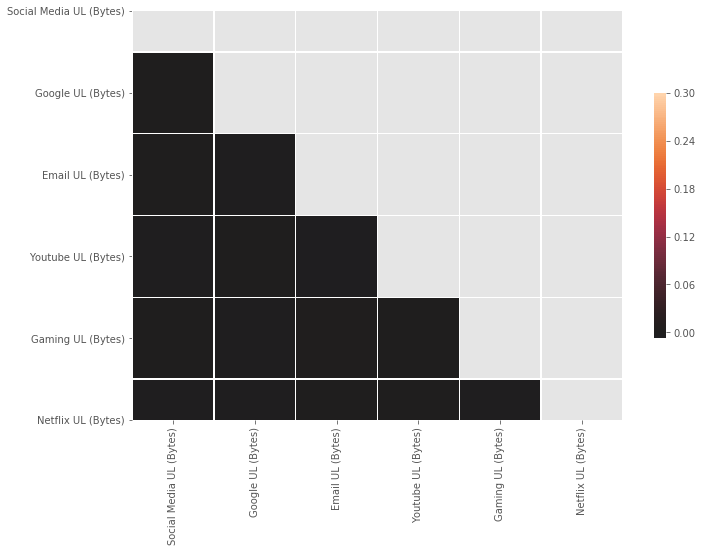

In [115]:
ulCorelation =  df[['Social Media UL (Bytes)','Google UL (Bytes)','Email UL (Bytes)','Youtube UL (Bytes)','Gaming UL (Bytes)','Netflix UL (Bytes)']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(ulCorelation, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(ulCorelation, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [116]:
ulCorelation.style.background_gradient()

,Social Media UL (Bytes),Google UL (Bytes),Email UL (Bytes),Youtube UL (Bytes),Gaming UL (Bytes),Netflix UL (Bytes)
Social Media UL (Bytes),1.000000,0.001094,-0.001423,-0.002380,0.000846,-0.002498
Google UL (Bytes),0.001094,1.000000,-0.002056,0.001679,-0.002510,-0.004072
Email UL (Bytes),-0.001423,-0.002056,1.000000,-0.006830,0.005003,0.000532
Youtube UL (Bytes),-0.002380,0.001679,-0.006830,1.000000,0.000905,0.002469
Gaming UL (Bytes),0.000846,-0.002510,0.005003,0.000905,1.000000,-0.004006
Netflix UL (Bytes),-0.002498,-0.004072,0.000532,0.002469,-0.004006,1.000000


### 1.8 Variable transformations
segment the user into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class.

In [122]:
decile_classes = df.groupby(['Dur. (ms)']).sum()
decile_classes

,Bearer Id,Start ms,End ms,IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Total DL (Bytes),total_google_DV,total_youtube_DV,total_email_DV,total_gaming_DV,total_netflix_DV,total_social_DV,total_other_DV,total_DV,total_social_media_DV
Dur. (ms),,,,,,,,,,,,,,,,,,,,,
7142.0,1.304243e+19,686.0,674.0,2.082017e+14,3.376351e+10,3.539741e+13,40.0,15.0,340.0,84.0,...,531304885.0,8933196.0,15264002.0,2264693.0,517329331.0,7859901.0,1065060.0,33455346.0,558334893.0,1065060.0
7146.0,6.917538e+18,354.0,928.0,2.082014e+14,3.366566e+10,3.560811e+13,164.0,1.0,7755.0,812.0,...,642662584.0,4680503.0,19778800.0,1075475.0,619324450.0,31358730.0,1163449.0,375530262.0,678517390.0,1163449.0
7189.0,1.304243e+19,279.0,279.0,2.082019e+14,3.365933e+10,3.556951e+13,39.0,6.0,27346.0,719.0,...,218392847.0,5458634.0,22378059.0,1028980.0,203674294.0,32348712.0,3431790.0,783669544.0,259536307.5,3431790.0
7212.0,1.013887e+19,789.0,434.0,2.082015e+14,3.366371e+10,3.572201e+13,85.0,2.0,8.0,14.0,...,110199777.0,3322061.0,18559695.0,925210.0,91126558.0,22971917.0,2810974.0,137512067.0,140464511.0,2810974.0
7258.0,6.917538e+18,704.0,784.0,2.082010e+14,3.369839e+10,3.548691e+13,156.0,1.0,2509.0,397.0,...,790704625.0,10015999.0,35149499.0,1629885.0,767565928.0,13639254.0,2492057.0,228133871.0,836659601.0,2492057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241506.0,7.277826e+18,798.0,36.0,2.082015e+14,3.368117e+10,3.575751e+13,34.0,4.0,32921.0,815.0,...,394569323.0,10176633.0,15289745.0,2350326.0,375932225.0,19823436.0,3586403.0,201256044.0,442145773.0,3586403.0
241515.0,1.304243e+19,457.0,407.0,2.082010e+14,3.366378e+10,3.536441e+13,41.0,22.0,58479.0,1202.0,...,710669140.0,7905553.0,39828702.0,1920928.0,664632498.0,29503801.0,840730.0,341823816.0,748608022.0,840730.0
241522.0,1.311448e+19,582.0,867.0,2.082014e+14,3.366047e+10,3.560851e+13,67.0,5.0,47.0,46.0,...,113244284.0,4405421.0,9401677.0,2366310.0,96440658.0,32242601.0,1412486.0,739641387.0,153498431.0,1412486.0


1.8 Dimensionality Reduction